Avståndet mellan punkterna [10 15] och [15 20] är 7.1


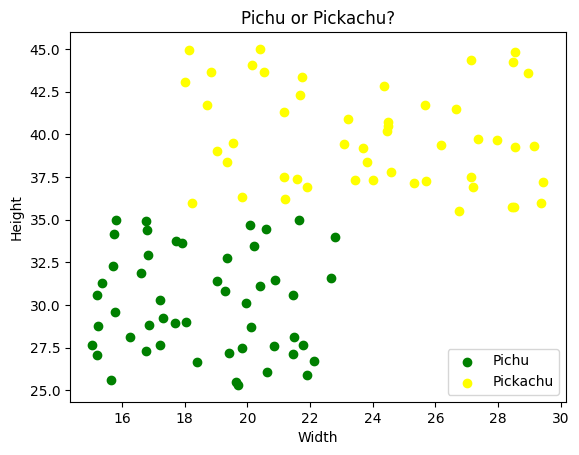

In [9]:
import numpy as np
import matplotlib.pylab as plt

# Låter användaren skriva in egna punkter
user_width = float(input("Ange bredd: "))
user_height = float(input("Ange höjd: "))


pichu_data = [
    (20.11541438766307, 28.701809671168824), (15.200086041781336, 27.095070307714877),
    (17.200234546952956, 27.669778220491132), (16.785685905190583, 34.36654587712494),
    (20.8917697133121, 31.480353852465935), (20.41359589938329, 31.091310056669883),
    (22.137436541638763, 26.71138648198097), (15.695510661035328, 32.291267979503495),
    (18.375374557482164, 26.634024937619284), (15.238377755504562, 28.794554417576478),
    (16.749103798428827, 34.895233506365955), (19.042842304826898, 31.399997598540928),
    (15.212287757470909, 30.569497437746463), (16.59070120549319, 31.846142509898748),
    (20.199075502236184, 33.4285192018981), (19.35953184482573, 32.75999911546245),
    (16.763524976325574, 27.290480719641042), (19.71412547100727, 25.321002439040377),
    (21.475443653422612, 28.154530480590818), (15.051990077424488, 27.67740875975703),
    (21.446554014662464, 27.109828435863264), (20.585115159905815, 34.429097143350546),
    (17.722004132143937, 33.76367626472669), (16.24383599849425, 28.14677880798478),
    (22.65770457765425, 31.5543866529488), (17.692756360901015, 28.95631901060664),
    (15.741966747041182, 34.14547589740543), (15.773731014667712, 29.588518525873987),
    (21.779954930779677, 27.648801664980525), (19.82980825093513, 27.466275076939834),
    (21.45702618619504, 30.61368134163151), (20.837854293550542, 27.627416085229353),
    (19.289824731637605, 30.845859902235404), (22.784926111834963, 33.97822883602477),
    (18.02827501766683, 28.994005051403974), (19.416325050185815, 27.193207591572833),
    (21.63523731402396, 34.97537606495111), (19.94815801891397, 30.095262936764644),
    (21.89365520248622, 25.90909412173794), (19.618817162054096, 25.471163754247346),
    (20.63657468971939, 26.096491303506593), (15.366595069245298, 31.2744604170309),
    (16.823186205212373, 32.920793643629644), (17.315103708816856, 29.22159966799684),
    (15.63833581538902, 25.63527706151957), (16.862327090888243, 28.816192865065368),
    (15.808011435277834, 34.96121380240097), (17.223788824880735, 30.29114345099137),
    (20.085475554115202, 34.71078377613618), (17.918657431760675, 33.60779702234498)
]

pikachu_data = [
    (18.137772263313835, 44.951493566608946), (26.648661832322336, 41.49878057639454),
    (26.180524428318897, 39.38100083914504), (24.44364396490554, 40.175758410355904),
    (21.201902279430513, 36.21004195868266), (25.691541582957697, 37.24697337031557),
    (19.338626083150515, 38.38085562147455), (23.21718300802926, 40.88308718457233),
    (23.444684475950478, 37.30114732596577), (29.445791130252964, 37.20217384451559),
    (28.51023528453833, 35.709930860090324), (21.16066860901309, 41.31102957270099),
    (24.00703335660358, 37.28941783811155), (20.143822566361578, 44.054200130061275),
    (28.951534072137846, 43.59635400253747), (28.4462228380412, 35.70857349888654),
    (21.581337497383593, 37.380046343689955), (25.66739393839206, 41.68977778296281),
    (25.30764253725807, 37.14236807370439), (19.834071222595618, 36.32311848725025),
    (27.150129600901813, 44.35514240580671), (24.472548361435507, 40.710430933252844),
    (27.3435177435667, 39.726710263117944), (24.36424406634213, 42.846194242907536),
    (18.006862753535323, 43.074969977666434), (21.889872684056076, 36.90409914361878),
    (18.233720908629987, 35.969308142288234), (29.149183395175406, 39.310511824063774),
    (28.54466253387821, 39.23578623019921), (27.97998635233415, 39.67024668036675),
    (21.690169504831935, 42.290758494598506), (18.69510199793025, 41.73364547293301),
    (28.536115190448484, 44.84165211365966), (29.36339334357593, 35.98417871151959),
    (19.027841424814547, 39.02621282102269), (23.831885559799368, 38.39302605394963),
    (18.830550221620605, 43.61672536352791), (27.12722598308678, 37.48656333920286),
    (27.190013151683853, 36.90208908440812), (19.540697573997154, 39.48613547833132),
    (23.703388537184775, 39.21881639834404), (24.597643121939328, 37.785451446669406),
    (21.18067954728071, 37.49806447882101), (28.46919649302309, 44.23265599276013),
    (23.077655282410642, 39.43130745053457), (20.541578465304983, 43.613491047618304),
    (24.4715530653535, 40.50325312449848), (26.759172829079716, 35.505883295248815),
    (20.41381276067635, 44.992824684127264), (21.74059549561074, 43.36027585079952)
]

pichu_array = np.array(pichu_data)
pikachu_array = np.array(pikachu_data)


#beräknar avstånd mellan två punkter
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


# två testpunkter
test_point_1 = np.array([10, 15])
test_point_2 = np.array([15, 20])

# Beräkna avståndet mellan de två punkterna
distance = calculate_distance(test_point_1, test_point_2)


# Skriv ut avståndet
print(f"Avståndet mellan punkterna {test_point_1} och {test_point_2} är {distance:.2}")


# plottar testdatan där punkterna läses in från 0 som punktens första värde som är width och 1 som är det andra värdet height
plt.scatter(pichu_array[:, 0], pichu_array[:, 1], color='green', label='Pichu')
plt.scatter(pikachu_array[:, 0], pikachu_array[:, 1], color='yellow', label='Pickachu')
plt.title('Pichu or Pickachu?')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.show()